### Natural Language Processing of Disaster Tweets
### Vivian Do
### October 23, 2022

Note: Original dataframe was modified using Microsoft Excel to delete unrelated tweets and fill in missing keywords 

In [59]:
#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
import statistics as stats

In [60]:
#Import training and test set
train=pd.read_csv("tweets_train_filled.csv")
test=pd.read_csv("tweets_test.csv")

In [61]:
#Show dimensions 
#training
print("Number of rows:", train.shape[0])
print("Number of columns:", train.shape[1])

#test
print("Number of rows:", test.shape[0])
print("Number of columns:", test.shape[1])

Number of rows: 7597
Number of columns: 5
Number of rows: 3263
Number of columns: 4


In [62]:
#Display fields in training set
train.columns.values.tolist()

['id', 'keyword', 'location', 'text', 'target']

In [63]:
#Display fields in test set
test.columns.values.tolist()

#'target' field is only in training set. This is what we are predicting for test set

['id', 'keyword', 'location', 'text']

In [64]:
train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [65]:
test.dtypes

id           int64
keyword     object
location    object
text        object
dtype: object

In [66]:
#There are 110 duplicated tweets in training set and 20 in the test set. 
print(train.duplicated(subset=['text']).sum())
print(test.duplicated(subset=['text']).sum())

110
20


In [67]:
#Drop duplicated tweets and confirm that they are dropped. 
#By default, the drop_duplicates() function deletes all duplicates except the first entry (keep=first)
#Inplace=True changes source dataframe 
train.drop_duplicates(subset ='text',
                     inplace=True)
test.drop_duplicates(subset ='text',
                     inplace=True)
print(train.duplicated(subset=['text']).sum())
print(test.duplicated(subset=['text']).sum())

0
0


In [68]:
#Dimensions after duplicated tweets are deleted. These numbers now match the number of unique tweets. 
#training
print("Number of rows:", train.shape[0])
print("Number of columns:", train.shape[1])

#test
print("Number of rows:", test.shape[0])
print("Number of columns:", test.shape[1])

Number of rows: 7487
Number of columns: 5
Number of rows: 3243
Number of columns: 4


In [69]:
#Show all null values in training set
train.isnull().sum()

id             0
keyword        0
location    2466
text           0
target         0
dtype: int64

In [70]:
#Show all null values in test set
test.isnull().sum()

id             0
keyword       26
location    1097
text           0
dtype: int64

There is a significant number of null values for location for both sets (about 33%). Keyword has been manually filled in for training set ONLY

In [71]:
#Show number of unique entries for each field
print(train['location'].nunique())
print(train['keyword'].nunique())
print(train['text'].nunique())
print(train['id'].nunique())

print(test['location'].nunique())
print(test['keyword'].nunique())
print(test['text'].nunique())
print(test['id'].nunique())

3327
221
7487
7487
1599
221
3243
3243


In [72]:
#Add 'character_count' column to display the number of characters used in each tweet
train['character_count']=train['text'].str.len()
train.head()

,id,keyword,location,text,target,character_count
0,1,earthquake,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,forest%20fire,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,evacuation,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,wild%20fires,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,wild%20fires,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


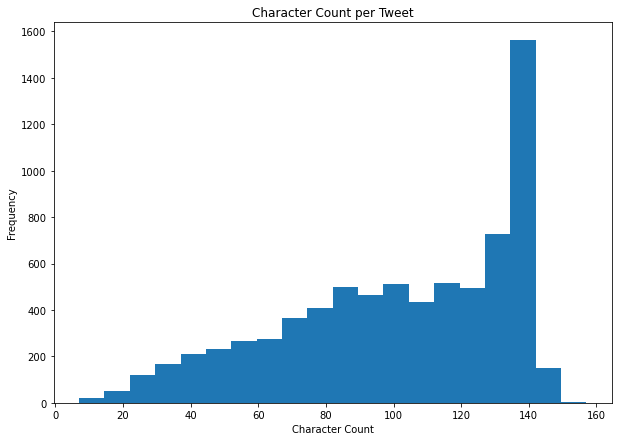

In [112]:
#Frequency of character_counts per tweet
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(train['character_count'],bins=20)
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.title("Character Count per Tweet")

# Show plot
plt.show()

Text(0.5, 1.0, 'Distribution of Character Count per Target')

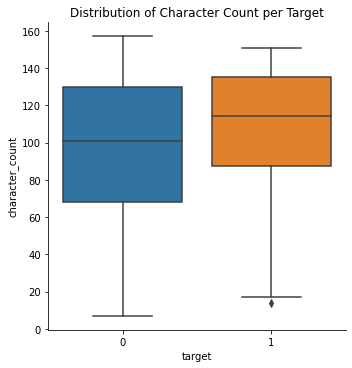

In [113]:
#Boxplot of distribution of character count for each target
sns.catplot(data=train, x="target", y="character_count", kind="box")
plt.title("Distribution of Character Count per Target")

In [110]:
#Show mean/median character_count for each value of target
character_count_per_target=train.groupby('target').agg({'character_count':['mean','median']})
print(character_count_per_target)

       character_count       
                  mean median
target                       
0            95.898578  101.0
1           107.982176  114.0


In [76]:
train['keyword'].unique()

array(['earthquake', 'forest%20fire', 'evacuation', 'wild%20fires',
       'flood', 'fire', 'tornado', 'heat%20wave', 'flooding', 'crash',
       'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crashed', 'crush', 'crushed', 'curfew', 'cyclone',
       'damage', 'danger', '

In [77]:
test['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [78]:
#Remove spaces in keywords(which show up as %20)
train['keyword'] = train['keyword'].str.replace(r'(%|\s*20)', '', regex=True)
train

,id,keyword,location,text,target,character_count
0,1,earthquake,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,forestfire,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,evacuation,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,wildfires,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,wildfires,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...,...,...
7588,10863,wrecked,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1,136
7589,10864,wrecked,NaN,on the flip side I'm at Walmart and there is a...,1,114
7590,10866,wrecked,NaN,Suicide bomber kills 15 in Saudi security site...,1,121
7592,10869,wrecked,NaN,Two giant cranes holding a bridge collapse int...,1,83


In [79]:
#Remove spaces in keywords(which show up as %20)
test['keyword'] = test['keyword'].str.replace(r'(%|\s*20)', '', regex=True)
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [80]:
#Show all unique keywords after removing spaces
train['keyword'].unique()

array(['earthquake', 'forestfire', 'evacuation', 'wildfires', 'flood',
       'fire', 'tornado', 'heatwave', 'flooding', 'crash', 'ablaze',
       'accident', 'aftershock', 'airplaneaccident', 'ambulance',
       'annihilated', 'annihilation', 'apocalypse', 'armageddon', 'army',
       'arson', 'arsonist', 'attack', 'attacked', 'avalanche', 'battle',
       'bioterror', 'bioterrorism', 'blaze', 'blazing', 'bleeding',
       'blewup', 'blight', 'blizzard', 'blood', 'bloody', 'blownup',
       'bodybag', 'bodybagging', 'bodybags', 'bomb', 'bombed', 'bombing',
       'bridgecollapse', 'buildingsburning', 'buildingsonfire', 'burned',
       'burning', 'burningbuildings', 'bushfires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemicalemergency',
       'clifffall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crashed', 'crush', 'crushed', 'curfew', 'cyclone',
       'damage', 'danger', 'dead', 'death', 'deaths', 'debris', 'deluge',
       'delu

In [81]:
#Stemming of training keywords

# library to clean data
import re
 
# Natural Language Tool Kit
import nltk
 
nltk.download('stopwords')
 
# to remove stopword
from nltk.corpus import stopwords
 
# for Stemming propose
from nltk.stem.porter import PorterStemmer
 
porter = PorterStemmer()

#A list of words to be stemmed
keyword_list = ['earthquake', 'forestfire', 'evacuation', 'wildfires', 'flood',
       'fire', 'tornado', 'heatwave', 'flooding', 'crash', 'ablaze',
       'accident', 'aftershock', 'airplaneaccident', 'ambulance',
       'annihilated', 'annihilation', 'apocalypse', 'armageddon', 'army',
       'arson', 'arsonist', 'attack', 'attacked', 'avalanche', 'battle',
       'bioterror', 'bioterrorism', 'blaze', 'blazing', 'bleeding',
       'blewup', 'blight', 'blizzard', 'blood', 'bloody', 'blownup',
       'bodybag', 'bodybagging', 'bodybags', 'bomb', 'bombed', 'bombing',
       'bridgecollapse', 'buildingsburning', 'buildingsonfire', 'burned',
       'burning', 'burningbuildings', 'bushfires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemicalemergency',
       'clifffall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crashed', 'crush', 'crushed', 'curfew', 'cyclone',
       'damage', 'danger', 'dead', 'death', 'deaths', 'debris', 'deluge',
       'deluged', 'demolish', 'demolished', 'demolition', 'derail',
       'derailed', 'derailment', 'desolate', 'desolation', 'destroy',
       'destroyed', 'destruction', 'detonate', 'detonation', 'devastated',
       'devastation', 'disaster', 'displaced', 'drought', 'drown',
       'drowned', 'drowning', 'duststorm', 'electrocute', 'electrocuted',
       'emergency', 'emergencyplan', 'emergencyservices', 'engulfed',
       'epicentre', 'evacuate', 'evacuated', 'explode', 'exploded',
       'explosion', 'eyewitness', 'famine', 'fatal', 'fatalities',
       'fatality', 'fear', 'firetruck', 'firstresponders', 'flames',
       'flattened', 'floods', 'forestfires', 'hail', 'hailstorm', 'harm',
       'hazard', 'hazardous', 'hellfire', 'hijack', 'hijacker',
       'hijacking', 'hostage', 'hostages', 'hurricane', 'injured',
       'injuries', 'injury', 'inundated', 'inundation', 'landslide',
       'lava', 'lightning', 'loudbang', 'massmurder', 'massmurderer',
       'massacre', 'mayhem', 'meltdown', 'military', 'mudslide',
       'naturaldisaster', 'nucleardisaster', 'nuclearreactor',
       'obliterate', 'obliterated', 'obliteration', 'oilspill',
       'outbreak', 'pandemonium', 'panic', 'panicking', 'police',
       'quarantine', 'quarantined', 'radiationemergency', 'rainstorm',
       'razed', 'refugees', 'rescue', 'rescued', 'rescuers', 'riot',
       'rioting', 'rubble', 'ruin', 'sandstorm', 'screamed', 'screaming',
       'screams', 'seismic', 'sinkhole', 'sinking', 'siren', 'sirens',
       'smoke', 'snowstorm', 'storm', 'stretcher', 'structuralfailure',
       'suicidebomb', 'suicidebomber', 'suicidebombing', 'sunk',
       'survive', 'survived', 'survivors', 'terrorism', 'terrorist',
       'threat', 'thunder', 'thunderstorm', 'tragedy', 'trapped',
       'trauma', 'traumatised', 'trouble', 'tsunami', 'twister',
       'typhoon', 'upheaval', 'violentstorm', 'volcano', 'warzone',
       'weapon', 'weapons', 'whirlwind', 'wildfire', 'windstorm',
       'wounded', 'wounds', 'wreck', 'wreckage', 'wrecked']

print("{0:20}{1:20}".format("Keyword","Stem"))
for word in keyword_list:
    print("{0:20}{1:20}".format(word,porter.stem(word)))

Keyword             Stem                
earthquake          earthquak           
forestfire          forestfir           
evacuation          evacu               
wildfires           wildfir             
flood               flood               
fire                fire                
tornado             tornado             
heatwave            heatwav             
flooding            flood               
crash               crash               
ablaze              ablaz               
accident            accid               
aftershock          aftershock          
airplaneaccident    airplaneaccid       
ambulance           ambul               
annihilated         annihil             
annihilation        annihil             
apocalypse          apocalyps           
armageddon          armageddon          
army                armi                
arson               arson               
arsonist            arsonist            
attack              attack              
attacked        

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/viviando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
#Create new column for stemmed keywords
keyword_list = ['earthquake', 'forestfire', 'evacuation', 'wildfires', 'flood',
       'fire', 'tornado', 'heatwave', 'flooding', 'crash', 'ablaze',
       'accident', 'aftershock', 'airplaneaccident', 'ambulance',
       'annihilated', 'annihilation', 'apocalypse', 'armageddon', 'army',
       'arson', 'arsonist', 'attack', 'attacked', 'avalanche', 'battle',
       'bioterror', 'bioterrorism', 'blaze', 'blazing', 'bleeding',
       'blewup', 'blight', 'blizzard', 'blood', 'bloody', 'blownup',
       'bodybag', 'bodybagging', 'bodybags', 'bomb', 'bombed', 'bombing',
       'bridgecollapse', 'buildingsburning', 'buildingsonfire', 'burned',
       'burning', 'burningbuildings', 'bushfires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemicalemergency',
       'clifffall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crashed', 'crush', 'crushed', 'curfew', 'cyclone',
       'damage', 'danger', 'dead', 'death', 'deaths', 'debris', 'deluge',
       'deluged', 'demolish', 'demolished', 'demolition', 'derail',
       'derailed', 'derailment', 'desolate', 'desolation', 'destroy',
       'destroyed', 'destruction', 'detonate', 'detonation', 'devastated',
       'devastation', 'disaster', 'displaced', 'drought', 'drown',
       'drowned', 'drowning', 'duststorm', 'electrocute', 'electrocuted',
       'emergency', 'emergencyplan', 'emergencyservices', 'engulfed',
       'epicentre', 'evacuate', 'evacuated', 'explode', 'exploded',
       'explosion', 'eyewitness', 'famine', 'fatal', 'fatalities',
       'fatality', 'fear', 'firetruck', 'firstresponders', 'flames',
       'flattened', 'floods', 'forestfires', 'hail', 'hailstorm', 'harm',
       'hazard', 'hazardous', 'hellfire', 'hijack', 'hijacker',
       'hijacking', 'hostage', 'hostages', 'hurricane', 'injured',
       'injuries', 'injury', 'inundated', 'inundation', 'landslide',
       'lava', 'lightning', 'loudbang', 'massmurder', 'massmurderer',
       'massacre', 'mayhem', 'meltdown', 'military', 'mudslide',
       'naturaldisaster', 'nucleardisaster', 'nuclearreactor',
       'obliterate', 'obliterated', 'obliteration', 'oilspill',
       'outbreak', 'pandemonium', 'panic', 'panicking', 'police',
       'quarantine', 'quarantined', 'radiationemergency', 'rainstorm',
       'razed', 'refugees', 'rescue', 'rescued', 'rescuers', 'riot',
       'rioting', 'rubble', 'ruin', 'sandstorm', 'screamed', 'screaming',
       'screams', 'seismic', 'sinkhole', 'sinking', 'siren', 'sirens',
       'smoke', 'snowstorm', 'storm', 'stretcher', 'structuralfailure',
       'suicidebomb', 'suicidebomber', 'suicidebombing', 'sunk',
       'survive', 'survived', 'survivors', 'terrorism', 'terrorist',
       'threat', 'thunder', 'thunderstorm', 'tragedy', 'trapped',
       'trauma', 'traumatised', 'trouble', 'tsunami', 'twister',
       'typhoon', 'upheaval', 'violentstorm', 'volcano', 'warzone',
       'weapon', 'weapons', 'whirlwind', 'wildfire', 'windstorm',
       'wounded', 'wounds', 'wreck', 'wreckage', 'wrecked']
for word in keyword_list:
    train['stem'] = train.keyword.apply(porter.stem)

In [83]:
train.head(10)

,id,keyword,location,text,target,character_count,stem
0,1,earthquake,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,earthquak
1,4,forestfire,NaN,Forest fire near La Ronge Sask. Canada,1,38,forestfir
2,5,evacuation,NaN,All residents asked to 'shelter in place' are ...,1,133,evacu
3,6,wildfires,NaN,"13,000 people receive #wildfires evacuation or...",1,65,wildfir
4,7,wildfires,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,wildfir
5,8,wildfires,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110,wildfir
6,10,flood,NaN,#flood #disaster Heavy rain causes flash flood...,1,95,flood
7,13,fire,NaN,I'm on top of the hill and I can see a fire in...,1,59,fire
8,14,evacuation,NaN,There's an emergency evacuation happening now ...,1,79,evacu
9,15,tornado,NaN,I'm afraid that the tornado is coming to our a...,1,52,tornado


In [84]:
train['stem'].nunique()

165

In [85]:
#Show most commonly used keywords in training
(train.keyword.value_counts()).head(20)

ablaze        65
fatalities    45
armageddon    42
deluge        42
harm          41
bodybags      41
damage        41
earthquake    40
collided      40
fear          40
sinking       40
siren         40
evacuate      40
outbreak      40
windstorm     40
explosion     39
weapon        39
weapons       39
whirlwind     39
collision     39
Name: keyword, dtype: int64

Top 5 keywords used overall: (65) ablaze, (45) fatalities, (42) armageddon, deluge, (41) harm, bodybags, damage, (40) earthquake,collided, fear, sinking, siren,evacuate, outbreak, windstorm

In [86]:
#Show most commly used stemmed keywords in training
(train.stem.value_counts()).head(20)

fatal          117
evacu          111
flood          111
bodybag        107
derail         106
scream         105
drown          104
bomb           100
hijack          98
suicidebomb     97
obliter         91
weapon          78
death           74
collid          73
blaze           72
quarantin       71
attack          71
wound           70
explod          70
wreck           70
Name: stem, dtype: int64

Top 5 stemmed-keywords used overall: (117) fatal, (111) evacu, flood, (107) bodybag, (106) derail, (105) scream

In [87]:
#Show most commonly used keywords in test
(test.keyword.value_counts()).head(24)

deluged            23
demolished         22
rubble             22
obliteration       21
seismic            21
snowstorm          21
sirens             21
annihilation       21
firstresponders    21
dead               20
mayhem             20
avalanche          20
catastrophic       20
survivors          20
obliterate         19
hostage            19
devastated         19
trauma             19
wildfires          19
obliterated        19
terrorist          19
suicidebomber      19
crushed            19
bioterrorism       19
Name: keyword, dtype: int64

In [88]:
#Top 5 keywords associated with disaster and non-disasters
train_1=train.loc[:, ['keyword', 'target']]
train_keyword_per_target = train_1.groupby('keyword')
train_keyword_per_target.value_counts().sort_values(ascending=False).head(30)

keyword      target
deaths       1         37
blaze        0         37
oilspill     1         36
armageddon   0         36
sinking      0         34
panic        0         34
harm         0         34
ablaze       1         34
evacuate     1         33
crush        0         33
suicidebomb  1         33
pandemonium  0         33
screaming    0         32
injury       0         32
blood        0         32
blizzard     0         32
bleeding     0         32
siren        0         32
sunk         0         32
flames       0         32
deluge       0         32
blewup       0         31
bodybagging  0         31
earthquake   0         31
blownup      0         31
derailed     1         31
screamed     0         31
fatality     0         31
fear         0         31
ablaze       0         31
dtype: int64

Top keywords associated with real disasters: (37) deaths, (36) oilspill, (34) ablaze, (33) evacuate, (33) suicidebomb,(31) derailed

Top keywords associated with a non-disasters: (37) blaze, (36) armageddon, (34) sinking, (34) panic, (34) harm,(33) crush, pandemonium, (32)screaming, injury, blood, blizzard, bleeding, siren, sunk, flames, deluge       

In [89]:
##Show highest percentages of real and non-disasters for all keywords##

(train_keyword_per_target.value_counts(normalize=True) * 100).sort_values(ascending=False).head(20)

keyword            target
blaze              0         97.368421
deaths             1         97.368421
oilspill           1         97.297297
suicidebomb        1         97.058824
suicidebomber      1         96.666667
obliteration       1         96.551724
rubble             0         96.428571
bodybagging        0         93.939394
blownup            0         93.939394
derailed           1         93.939394
blewup             0         93.939394
trauma             0         93.548387
panic              0         91.891892
bleeding           0         91.428571
blood              0         91.428571
screamed           0         91.176471
accident           0         90.909091
blight             0         90.625000
structuralfailure  1         90.322581
mayhem             0         90.000000
dtype: float64

Highest percentage of real disaster per usage: deaths, oilspill, suicidebomb, suicidebomber, obliteration

Highest percentage of non-real disaster per usage:blaze, rubble, bodybagging, blownup, blewup

In [90]:
#Select only rows w/ top 5 keywords used in real disasters and sort by keyword. 
train_top5_keyword = train_1.loc[train_1['keyword'].isin(['deaths', 'oilspill', 'ablaze', 'evacuate', 'suicidebomb', 'derailed'])]
train_top5_keyword_1 = train_top5_keyword.groupby('keyword')
train_top5_keyword_1.value_counts().head(30)

keyword      target
ablaze       1         34
             0         31
deaths       1         37
             0          1
derailed     1         31
             0          2
evacuate     1         33
             0          7
oilspill     1         36
             0          1
suicidebomb  1         33
             0          1
dtype: int64

In [91]:
#Top 5 most frequently used keywords in real disasters in percentages 
(train_top5_keyword_1.value_counts(normalize=True) * 100).sort_values(ascending=False).head(50)

keyword      target
deaths       1         97.368421
oilspill     1         97.297297
suicidebomb  1         97.058824
derailed     1         93.939394
evacuate     1         82.500000
ablaze       1         52.307692
             0         47.692308
evacuate     0         17.500000
derailed     0          6.060606
suicidebomb  0          2.941176
oilspill     0          2.702703
deaths       0          2.631579
dtype: float64

In [92]:
#Select only rows w/ top 5 keywords used in non-real disasters and sort by keyword.
train_top5_keyword_non = train_1.loc[train_1['keyword'].isin(
    ['blaze', 'armageddon', 'sinking', 'panic', 'harm','crush', 'pandemonium', 
    'screaming', 'injury', 'blood', 'blizzard', 'bleeding', 'siren', 'sunk', 'flames', 'deluge'])]
train_top5_keyword_2 = train_top5_keyword_non.groupby('keyword')
train_top5_keyword_2.value_counts().head(50)

keyword      target
armageddon   0         36
             1          6
blaze        0         37
             1          1
bleeding     0         32
             1          3
blizzard     0         32
             1          5
blood        0         32
             1          3
crush        0         33
             1          4
deluge       0         32
             1         10
flames       0         32
             1          7
harm         0         34
             1          7
injury       0         32
             1          5
pandemonium  0         33
             1          4
panic        0         34
             1          3
screaming    0         32
             1          4
sinking      0         34
             1          6
siren        0         32
             1          8
sunk         0         32
             1          7
dtype: int64

In [93]:
#Top 5 stems most frequently associated with disaster and non-disasters
train_2=train.loc[:, ['stem', 'target']]
train_stem_per_target = train_2.groupby('stem')
train_stem_per_target.value_counts().sort_values(ascending=False).head(20)

stem         target
bodybag      0         88
scream       0         84
flood        1         82
fatal        0         74
bomb         1         73
suicidebomb  1         72
evacu        1         69
derail       1         69
blaze        0         67
drown        0         60
crush        0         59
siren        0         58
death        1         57
destroy      0         56
delug        0         56
obliter      0         54
injuri       0         53
wreck        1         52
desol        0         51
collaps      0         51
dtype: int64

Top 5 stems associated with disaster: (82) flood, (73) bomb, (72) suicidebomb, (69) derail, evacu, (57) death

Top 5 stems associated with non-disaster: (88) bodybag, (84) scream, (74) fatal, (67) blaze, (60) drown

In [94]:
#Show highest percentages of real and non-disasters for all keywords
(train_keyword_per_target.value_counts(normalize=True) * 100).sort_values(ascending=False).head(50)


keyword            target
blaze              0         97.368421
deaths             1         97.368421
oilspill           1         97.297297
suicidebomb        1         97.058824
suicidebomber      1         96.666667
obliteration       1         96.551724
rubble             0         96.428571
bodybagging        0         93.939394
blownup            0         93.939394
derailed           1         93.939394
blewup             0         93.939394
trauma             0         93.548387
panic              0         91.891892
bleeding           0         91.428571
blood              0         91.428571
screamed           0         91.176471
accident           0         90.909091
blight             0         90.625000
structuralfailure  1         90.322581
mayhem             0         90.000000
bombing            1         89.655172
sirens             0         89.655172
crush              0         89.189189
pandemonium        0         89.189189
screaming          0         88.888889

In [95]:
#Show highest percentages of real and non-disasters for all stems
(train_stem_per_target.value_counts(normalize=True) * 100).sort_values(ascending=False).head(50)

stem              target
oilspil           1         97.297297
rubbl             0         96.428571
blownup           0         93.939394
blewup            0         93.939394
trauma            0         93.548387
blaze             0         93.055556
panic             0         91.891892
blood             0         91.428571
bleed             0         91.428571
accid             0         90.909091
blight            0         90.625000
structuralfailur  1         90.322581
mayhem            0         90.000000
pandemonium       0         89.189189
rainstorm         1         88.235294
apocalyps         0         87.500000
crush             0         86.764706
blizzard          0         86.486486
bloodi            0         85.714286
armageddon        0         85.714286
traumatis         0         85.714286
naturaldisast     1         85.294118
tsunami           0         85.294118
sink              0         85.000000
landslid          0         84.848485
hailstorm         0      

Highest percentage of real disaster per usage: oilspil, structuralfailur,rainstorm, naturaldisast, bushfir

Highest percentage of non-real disaster per usage: rubbl,blownup, blewup, trauma, blaze

In [96]:
#Show counts for highest percentage of real and non-disasters in stems (of cell above)
train_highest_perct= train_2.loc[train_2['stem'].isin(['oilspil', 'structuralfailur', 'rainstorm', 'naturaldisast','bushfir','rubbl','blownup','blewup','trauma','blaze'])]
train_highest_perct2 = train_highest_perct.groupby('stem')
train_highest_perct2.value_counts()

stem              target
blaze             0         67
                  1          5
blewup            0         31
                  1          2
blownup           0         31
                  1          2
bushfir           1         20
                  0          5
naturaldisast     1         29
                  0          5
oilspil           1         36
                  0          1
rainstorm         1         30
                  0          4
rubbl             0         27
                  1          1
structuralfailur  1         28
                  0          3
trauma            0         29
                  1          2
dtype: int64

In [97]:
#Select top 5 stems used most frequently in real disasters and show percentage 
train_top5_stem = train_2.loc[train_2['stem'].isin(['flood','bomb', 'suicidebomb', 'derail', 'evacu','death'])]
train_top5_stem_1 = train_top5_stem.groupby('stem')
train_top5_stem_1.value_counts().head(30)

stem         target
bomb         1         73
             0         27
death        1         57
             0         17
derail       1         69
             0         37
evacu        1         69
             0         42
flood        1         82
             0         29
suicidebomb  1         72
             0         25
dtype: int64

In [98]:
#Top 5 most frequently used stems in real disaster in percentage 
(train_top5_stem_1.value_counts(normalize=True) * 100).sort_values(ascending=False).head(50)

stem         target
death        1         77.027027
suicidebomb  1         74.226804
flood        1         73.873874
bomb         1         73.000000
derail       1         65.094340
evacu        1         62.162162
             0         37.837838
derail       0         34.905660
bomb         0         27.000000
flood        0         26.126126
suicidebomb  0         25.773196
death        0         22.972973
dtype: float64

In [99]:
#Select top 5 stems used most frequently in non-disasters
train_top5_stem_non = train_2.loc[train_2['stem'].isin(['bodybag', 'scream', 'fatal', 'blaze', 'drown'])]
train_top5_stem_2 = train_top5_stem_non.groupby('stem')
train_top5_stem_2.value_counts().head(30)

stem     target
blaze    0         67
         1          5
bodybag  0         88
         1         19
drown    0         60
         1         44
fatal    0         74
         1         43
scream   0         84
         1         21
dtype: int64

In [100]:
#Top 5 most frequently used stems in non-real disasters in percentages
(train_top5_stem_2.value_counts(normalize=True) * 100).sort_values(ascending=False).head(50)

stem     target
blaze    0         93.055556
bodybag  0         82.242991
scream   0         80.000000
fatal    0         63.247863
drown    0         57.692308
         1         42.307692
fatal    1         36.752137
scream   1         20.000000
bodybag  1         17.757009
blaze    1          6.944444
dtype: float64

In [101]:
train.target.value_counts()

0    4289
1    3198
Name: target, dtype: int64

In [102]:
#Show the frequency of real disasters and non-disasters for the most frequently used stems overall
train_mostfreq_stem = train_2.loc[train_2['stem'].isin(['fatal', 'evacu', 'flood', 'bodybag', 'derail', 'scream','drown','bomb', 'hijack', 'suicidebomb','obliter'])]
train_mostfreq_stem_1= train_mostfreq_stem.groupby('stem')
train_mostfreq_stem_1.value_counts().head(30)


stem         target
bodybag      0         88
             1         19
bomb         1         73
             0         27
derail       1         69
             0         37
drown        0         60
             1         44
evacu        1         69
             0         42
fatal        0         74
             1         43
flood        1         82
             0         29
hijack       0         50
             1         48
obliter      0         54
             1         37
scream       0         84
             1         21
suicidebomb  1         72
             0         25
dtype: int64

In [103]:
#Show the percentage of real disasters and non-disasters for the most frequently used stems overall
(train_mostfreq_stem_1.value_counts(normalize=True) * 100).head(50)

stem         target
bodybag      0         82.242991
             1         17.757009
bomb         1         73.000000
             0         27.000000
derail       1         65.094340
             0         34.905660
drown        0         57.692308
             1         42.307692
evacu        1         62.162162
             0         37.837838
fatal        0         63.247863
             1         36.752137
flood        1         73.873874
             0         26.126126
hijack       0         51.020408
             1         48.979592
obliter      0         59.340659
             1         40.659341
scream       0         80.000000
             1         20.000000
suicidebomb  1         74.226804
             0         25.773196
dtype: float64

In [104]:
import stylecloud

In [105]:
train['keyword'].to_csv('keyword.csv', header=False, index=False)
stylecloud.gen_stylecloud(file_path='keyword.csv',
                         icon_name="fab fa-twitter")

In [106]:
train['stem'].to_csv('stem.csv', header=False, index=False)
stylecloud.gen_stylecloud(file_path='stem.csv',
                         icon_name="fab fa-twitter")

In [107]:
test['keyword'].to_csv('test_keyword.csv', header=False, index=False)
stylecloud.gen_stylecloud(file_path='test_keyword.csv',
                         icon_name="fab fa-twitter")